# Homework - Week 03

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-02 11:25:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  7.14MB/s    in 0.2s    

2023-10-02 11:25:57 (7.14 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [98]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [99]:
df = pd.read_csv("data.csv")

df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury


## Data preparation

In [100]:
columns = ['make','model','year','engine_hp',
        'engine_cylinders','transmission_type','vehicle_style','highway_mpg',
        'city_mpg','msrp']
df = df[columns]

In [101]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [102]:
df.year = df.year.fillna(0)
df.highway_mpg = df.highway_mpg.fillna(0)
df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)
df.city_mpg = df.city_mpg.fillna(0)
df.msrp = df.msrp.fillna(0)

df.rename({'msrp':'price'},axis=1,inplace=True)

In [103]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

## Question 1

In [104]:
df['transmission_type'].mode()

0    automatic
Name: transmission_type, dtype: object

> automatic
## Question 2

In [105]:
numeric_cols = ['year','highway_mpg','engine_hp','engine_cylinders','city_mpg']
categorical_columns = ['make','model','transmission_type','vehicle_style']
y_model = ['price']

y_q2 = df[y_model]
df_q2 = df[numeric_cols]
corrM = df_q2.corr()

#corrM.head()
# np.corrcoef(corrM, df.price)
# corrM.corrwith(df.price)
df_q2.corrwith(df.price).sort_values(ascending=False)

engine_hp           0.650095
engine_cylinders    0.526274
year                0.227590
city_mpg           -0.157676
highway_mpg        -0.160043
dtype: float64

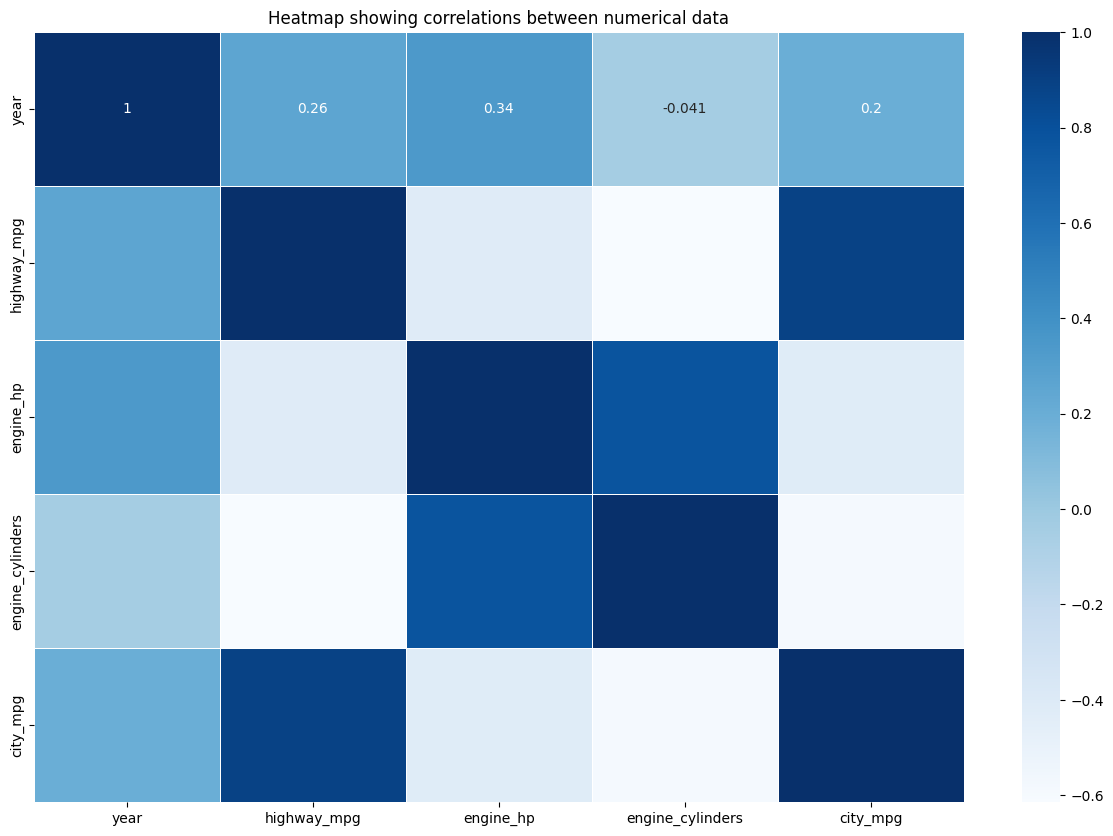

In [106]:
#@ INSPECTING HEATMAP:
plt.figure(figsize=(15,10))  
sns.heatmap(df_q2.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [107]:
df_q2.corr().unstack().sort_values(ascending = False)[:15]

year              year                1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
                  highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_cylinders  engine_hp           0.774851
engine_hp         engine_cylinders    0.774851
year              engine_hp           0.338714
engine_hp         year                0.338714
highway_mpg       year                0.258240
year              highway_mpg         0.258240
city_mpg          year                0.198171
year              city_mpg            0.198171
dtype: float64

> `engine_hp` and `engine_cylinders`
## Question 3

In [108]:
price_mean = df.price.mean()
df_q3 = df.copy()

df_q3['above_average'] = np.where(df_q3.price>=price_mean,1,0)


In [109]:
# split the data
df_full_train, df_test = train_test_split(df_q3, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [110]:
y_train = df_train.above_average.values
# y_val = df_val.above_average.values
# y_test = df_test.above_average.values

# del df_train['price']
# del df_val['price']
# del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [111]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_minf = df_train[categorical_columns].apply(calculate_mi)
df_minf = df_minf.sort_values(ascending=False)
df_minf

model                0.462344
make                 0.239769
vehicle_style        0.084143
transmission_type    0.020958
dtype: float64

> transmission_type
## Question 4

In [112]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [116]:
train_dict = df_train[categorical_columns + numeric_cols].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [118]:

val_dict = df_val[categorical_columns + numeric_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)


accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.12


> 0.12
## Question 5

In [119]:
features = categorical_columns + numeric_cols
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)


make 0.015509861519093573 0.10449013848090642
model 0.018866974402014264 0.10113302559798573
transmission_type 0.015090222408728496 0.1049097775912715
vehicle_style 0.015509861519093573 0.10449013848090642
year 0.014670583298363404 0.10532941670163659
highway_mpg 0.014670583298363404 0.10532941670163659
engine_hp 0.016349139739823743 0.10365086026017625
engine_cylinders 0.012992026856903052 0.10700797314309694
city_mpg 0.013411665967268144 0.10658833403273185


> city_mpg
## Question 6 

In [120]:
df_q6 = df.copy()
df_q6['price'] = np.log1p(df_q6['price'])

df_train_full, df_test = train_test_split(df_q6, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [122]:
train_dict = df_train[features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.487


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.487


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.487


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.487
10 0.487


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
